### Leveraging Machine learning to predict customers who are likely to default or not.
#### There has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

# This is Qualification Competition for the Data Science Nigeria AI Bootcamp 2020.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading in the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
target = train['default_status']
#Submission = pd.read_csv('SampleSubmission.csv')

In [3]:
# writing different functions to ensure modularity
#
class Analyzer:
    def __init__(self):
        pass
        
    def check_null(self, data):
        """This function returns a fraction of the
            null values per feature in the data
        ** Args: Data - pandas dataframe
        ** Return: decimal value - (sum of null values per feature / sum of data points)
        """
        nan_cols = [col for col in data.columns if data[col].isnull().sum() > 0]
        print(f"Shape: {data.shape}, Number of Columns with NaN: {len(nan_cols)}")
        return data[nan_cols].isnull().sum()/data.shape[0]

    def plot_feature_importances(self, model, data, num_features=50):
        """Returns a plot of the feature importance as scored by the model
        ** Args: Data - pandas dataframe
                 Model - Algorithm
        ** Return: bar plot
        """
        plt.figure(figsize=(15, 30));
        feature_importance_df = pd.DataFrame(gbc.feature_importances_, columns=['Importance'])
        feature_importance_df['Feature'] = train_data.columns
        sns.barplot(x="Importance", y="Features", data=feature_importance_df.sort_values(by=['Importance'], 
                                                                               ascending = False).head(num_features))
        plt.title(model);


    def categorical_plot(self, data, hue, cols=None):
        """Return a plot of categorical features in a data
        ** Args: Data - pandas dataframe
                 Hue - string
                 Categorical Columns - list
        ** Return: bar plot
        """
        if cols == None: cols = [cname for cname in data.columns if data[cname].dtype == 'object' and data[cname].nunique() < 20]
        for col in cols: 
            if col in data.columns:
                sns.countplot(y=col, hue=hue, data=data)
                plt.show()
                
    def get_score(self, data, target, model=None, prefit=False, scale=False, scale_type='StandardScaler'):
        """Returns the auc score of a base model
        ** Args: model, data, target
        ** Return: auc score - float
        """
        from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split

        x_t, x_v, y_t, y_v = train_test_split(data, target, stratify=target, test_size=0.3, random_state=0)
        if scale:
            x_t, x_v, y_t, y_v = self.scale(data, target, scale_type)
        if model == None:
            model = LogisticRegression().fit(x_t, y_t)
        if not prefit:
            model.fit(x_t, y_t)
        train_score = roc_auc_score(y_t, model.predict_proba(x_t)[:,1])
        test_score = roc_auc_score(y_v, model.predict_proba(x_v)[:,1])
        print(f"Train Score: {train_score:.4f},    Test Score: {test_score:.4f}")
    
    def scale(self, data, target, scale_type='StandardScaler'):
        from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
        from sklearn.model_selection import train_test_split

        x_t, x_v, y_t, y_v = train_test_split(data, target, stratify=target, test_size=0.3, random_state=0)
        ss = StandardScaler()
        mm = MinMaxScaler()
        rs = RobustScaler()
        
        if scale_type == 'StandardScaler':
            x_t, x_v = self.fit_scaler(ss, x_t, x_v)
        if scale_type == 'RobustScaler':
            x_t, x_v = self.fit_scaler(rs, x_t, x_v)
        else:
            x_t, x_v = self.fit_scaler(mm, x_t, x_v)
        return x_t, x_v, y_t, y_v
    
    def fit_scaler(self, scaler, x_train, x_val):
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_val = scaler.transform(x_val)
        return x_train, x_val

In [4]:
tools = Analyzer()

In [5]:
train.loc[train['default_status'] == 'yes', 'default_status'] = 1
train.loc[train['default_status'] == 'no', 'default_status'] = 0
train['default_status'] = train['default_status'].astype(int)

<AxesSubplot:>

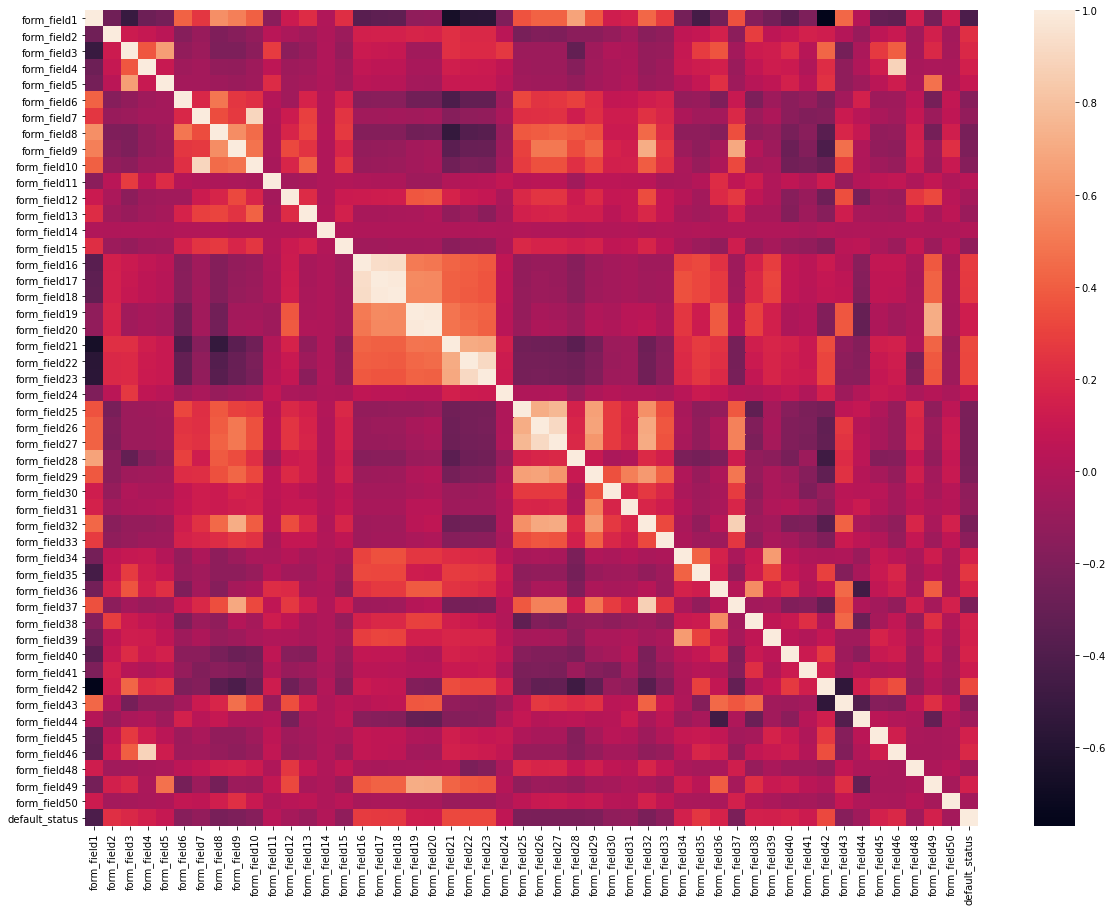

In [6]:
plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr())

In [7]:
#Creating a column for rows with columns missing
train["Num_Cols_NaN"] = train.T.isnull().sum()
test["Num_Cols_NaN"] = test.T.isnull().sum()

In [8]:
# Joining train and test together to avoid repeated preprocessing

train['is_train'] = 1
test['is_train'] = 0
all_data = pd.concat([train, test])

train.shape, test.shape, all_data.shape

((56000, 54), (24000, 53), (80000, 54))

In [9]:
tools.check_null(all_data)

Shape: (80000, 54), Number of Columns with NaN: 49


form_field1       0.045488
form_field2       0.069413
form_field3       0.006262
form_field4       0.006262
form_field5       0.006262
form_field6       0.237050
form_field7       0.092425
form_field8       0.237050
form_field9       0.142600
form_field10      0.006275
form_field11      0.560238
form_field12      0.175975
form_field13      0.104400
form_field15      0.400838
form_field16      0.231375
form_field17      0.198075
form_field18      0.184638
form_field19      0.000050
form_field20      0.006275
form_field21      0.282012
form_field22      0.364050
form_field23      0.503100
form_field24      0.236275
form_field25      0.096325
form_field26      0.132625
form_field27      0.165112
form_field28      0.006275
form_field29      0.006275
form_field30      0.455213
form_field31      0.702725
form_field32      0.096325
form_field33      0.021888
form_field34      0.006275
form_field35      0.412675
form_field36      0.036225
form_field37      0.096325
form_field38      0.006275
f

# Feature Engineering

In [10]:
all_data['avg_risk_factors'] = (all_data['form_field1'].fillna(0) + all_data['form_field2'].fillna(0)) / 2
all_data['avg_severity'] = (all_data['form_field3'] + all_data['form_field4'] + all_data['form_field5']) / 3
all_data['credit_scale'] = (all_data['form_field6'] + all_data['form_field8']) / 2
all_data['avg_tenure'] = (all_data['form_field32'] + all_data['form_field33']) / 2

In [11]:
all_data['def_on_ff1'] = np.NaN
for i in range(all_data.shape[0]):
    if all_data['form_field1'].iloc[i] <= 3200:
        all_data['def_on_ff1'].iloc[i] = 'most default'
    elif all_data['form_field1'].iloc[i] > 3200 and all_data['form_field1'].iloc[i] <= 3400:
        all_data['def_on_ff1'].iloc[i] = 'more default'
    else:
        all_data['def_on_ff1'].iloc[i] = 'less default'

In [12]:
# generating columns 
all_data['def_on_avg'] = np.NaN
for i in range(all_data.shape[0]):
    if all_data['avg_tenure'].iloc[i] <= 100 or all_data['avg_severity'].iloc[i] > 1 and all_data['def_on_ff1'].iloc[i] != 'less_default':
        all_data['def_on_avg'].iloc[i] = 'most often default'
    else:
        all_data['def_on_avg'].iloc[i] = 'less often default'

In [13]:
all_data['form_field32+33'] = all_data['form_field33'] + all_data['form_field32']
all_data['form_field6+8'] = all_data['form_field6'] + all_data['form_field8']
all_data['form_field17+18'] = all_data['form_field17'] + all_data['form_field18']
all_data['form_field19+20'] = all_data['form_field19'] + all_data['form_field20']
all_data['form_field4+46'] = all_data['form_field4'] + all_data['form_field46']

In [14]:
all_data.loc[all_data['avg_tenure'] > 150, 'def_on_ten'] = 'active'
all_data.loc[all_data['avg_tenure'] <= 150, 'def_on_ten'] = 'less active'

In [15]:
all_data['avg_credit_feats'] = np.NaN
pref = np.arange(6,16,1)
feats = ['form_field'+str(i) for i in pref]
for j in range(all_data.shape[0]):
    all_data['avg_credit_feats'].iloc[j] = all_data[feats].iloc[j].sum(axis=0) / len(feats)

In [16]:
all_data['avg_card_feats'] = np.NaN
pref = np.arange(16,28,1)
feats = ['form_field'+str(i) for i in pref]
for j in range(all_data.shape[0]):
    all_data['avg_card_feats'].iloc[j] = all_data[feats].iloc[j].sum(axis=0) / len(feats)

In [17]:
all_data['avg_time_feats'] = np.NaN
pref = np.arange(28,40,1)
feats = ['form_field'+str(i) for i in pref]
for j in range(all_data.shape[0]):
    all_data['avg_time_feats'].iloc[j] = all_data[feats].iloc[j].sum(axis=0) / len(feats)

In [18]:
all_data['avg_other_feats'] = np.NaN
pref = np.arange(42,48,1)
feats = ['form_field'+str(i) for i in pref]
feats.remove('form_field47')
feats.append('form_field50')
for j in range(all_data.shape[0]):
    all_data['avg_other_feats'].iloc[j] = all_data[feats].iloc[j].sum(axis=0) / len(feats)

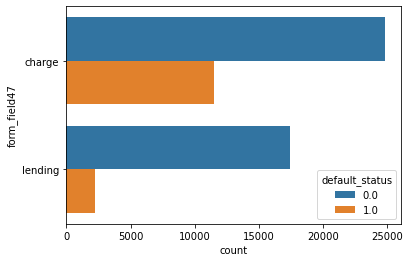

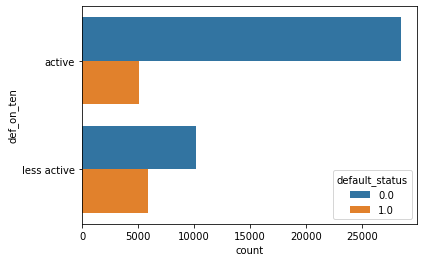

In [19]:
tools.categorical_plot(all_data[all_data['is_train']==1], 'default_status')

In [20]:
#Saving data to avoid repeatedly engineeering each time I restart runtime

all_data.to_csv('all_data44.csv', index=False)

In [21]:
all_data=pd.read_csv('all_data44.csv')

In [22]:
# Get the categorical cols
cat_cols = [col for col in all_data.drop(['Applicant_ID'], axis=1)
            if all_data[col].dtype == 'object']
cat_cols.remove('form_field47')
cols_generated = cat_cols

In [23]:
#****** Encoding the categorical cols *********

## One Hot encoding
one_hot_cols = [cname for cname in all_data.columns
                if all_data[cname].nunique() < 10 and all_data[cname].dtype == 'object']
for i in range(len(one_hot_cols)):
    all_data = pd.concat( [all_data, pd.get_dummies(all_data[one_hot_cols[i]], prefix='_')], axis=1 )

# Label encoding
all_data['form_field47'] = all_data['form_field47'].factorize()[0]
for i in range(len(cols_generated)):
    new_col = cols_generated[i] + '_label'
    all_data[new_col] = all_data[cols_generated[i]].factorize()[0]
# # cols_generated.append('form_field47')
# # all_data = all_data.drop([cols_generated], axis=1)

# Count encoding
for i in range(len(cols_generated)):
    all_data[cols_generated[i]] = all_data[cols_generated[i]].map(all_data[cols_generated[i]].value_counts())
    
all_data.shape

(80000, 82)

In [24]:
# Handling null values

fill_w = ['mean', 'median', 'std', 0, -999]
for i in range(len(fill_w)):
    target = train['default_status']
    train_t = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
                                                         'form_field40', 'form_field41', 
                                                          'form_field31', 'is_train',
                                                          'form_field48', 'form_field49'], axis=1)
    print('filling null with: ', fill_w[i], '.......')
    cols = train_t.columns
    for j in range(len(cols)):
        if fill_w[i] == 'mean':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].mean())
        elif fill_w[i] == 'median':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].median())
        elif fill_w[i] == 'std':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].std())
        else:
            train_t[cols[j]] = train_t[cols[j]].fillna(fill_w[i])
    print('Done filling null!')
    print('Getting score ......')
    tools.get_score(train_t, target, scale=True, scale_type='MinMaxScaler')

filling null with:  mean .......
Done filling null!
Getting score ......
Train Score: 0.8317,    Test Score: 0.8249
filling null with:  median .......
Done filling null!
Getting score ......
Train Score: 0.8316,    Test Score: 0.8249
filling null with:  std .......
Done filling null!
Getting score ......
Train Score: 0.8298,    Test Score: 0.8233
filling null with:  0 .......
Done filling null!
Getting score ......
Train Score: 0.8295,    Test Score: 0.8232
filling null with:  -999 .......
Done filling null!
Getting score ......
Train Score: 0.8090,    Test Score: 0.8019


In [25]:
# Handling null values
catt = CatBoostClassifier(verbose=False)

fill_w = ['mean', 'median', 'std', 0, -999]
for i in range(len(fill_w)):
    target = train['default_status']
    train_t = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status',
                                                         'form_field40', 'form_field41', 
                                                          'form_field31', 'is_train',
                                                          'form_field48', 'form_field49'], axis=1)
    print('filling null with: ', fill_w[i], '.......')
    cols = train_t.columns
    for j in range(len(cols)):
        if fill_w[i] == 'mean':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].mean())
        elif fill_w[i] == 'median':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].median())
        elif fill_w[i] == 'std':
            train_t[cols[j]] = train_t[cols[j]].fillna(train_t[cols[j]].std())
        else:
            train_t[cols[j]] = train_t[cols[j]].fillna(fill_w[i])
    print('Done filling null!')
    print('Getting score ......')
    tools.get_score(train_t, target, catt)

filling null with:  mean .......
Done filling null!
Getting score ......
Train Score: 0.9182,    Test Score: 0.8335
filling null with:  median .......
Done filling null!
Getting score ......
Train Score: 0.9171,    Test Score: 0.8338
filling null with:  std .......
Done filling null!
Getting score ......
Train Score: 0.9183,    Test Score: 0.8343
filling null with:  0 .......
Done filling null!
Getting score ......
Train Score: 0.9166,    Test Score: 0.8340
filling null with:  -999 .......
Done filling null!
Getting score ......
Train Score: 0.9169,    Test Score: 0.8348


In [26]:
#filling null
all_data = all_data.fillna(-999)

In [27]:
#Splitting Data back to train and test
target = all_data.loc[all_data['is_train']==1]['default_status']
train_data = all_data.loc[all_data['is_train']==1].drop(['Applicant_ID', 'default_status', #'form_field6', 'form_field14',
                                                         'form_field40', 'form_field41', #'form_field47',
                                                          'form_field31', 'is_train', #'form_field14',
                                                          'form_field48', 'form_field49'], axis=1)
test_data = all_data.loc[all_data['is_train']==0].drop(['Applicant_ID', 'default_status', #'form_field6', 'form_field14',
                                                         'form_field40', 'form_field41', 
                                                          'form_field31', 'is_train', #'form_field14',
                                                          'form_field48', 'form_field49'], axis=1)

In [31]:
#Training Catboost model using Stratified KFold
#and making predictions on test data
from sklearn.model_selection import StratifiedKFold
auc_list = list()
predictions_df = pd.DataFrame()
predictions_df['Applicant_ID'] = test['Applicant_ID']
predictions_df['default_status'] = np.zeros(len(test))

fold = StratifiedKFold(n_splits=10, shuffle= True, random_state= 42)
i = 1

for train_index, test_index in fold.split(train_data, target):
    print('Fold number: ', i)

    x_data, x_val = train_data.iloc[train_index], train_data.iloc[test_index]
    y_data, y_val = target.iloc[train_index], target.iloc[test_index]
    x_test = test_data
  
    cat = CatBoostClassifier(learning_rate=0.005, eval_metric='AUC',
                               use_best_model=True, random_state=0, n_estimators=5000, max_depth=8)
    cat.fit(x_data, y_data, eval_set=[(x_val, y_val)], early_stopping_rounds=300, verbose=1000)
        
    train_pred = cat.predict_proba(x_data)[:,1]
    test_pred = cat.predict_proba(x_val)[:,1]
       
    print('auc score on train:', roc_auc_score(y_data, train_pred))
    print('auc score on test', roc_auc_score(y_val, test_pred))
    auc_list.append(roc_auc_score(y_val, test_pred))
    current_pred = cat.predict_proba(x_test)[:,1]
        
    predictions_df['default_status']+=current_pred/fold.n_splits
    i += 1
        
print('Mean auc score on test: ', np.mean(auc_list))  

predictions_df.to_csv('submission.csv', index=False)
predictions_df.head()

Fold number:  1
0:	test: 0.8120838	best: 0.8120838 (0)	total: 98.2ms	remaining: 8m 10s
1000:	test: 0.8506466	best: 0.8506466 (1000)	total: 1m 22s	remaining: 5m 30s
2000:	test: 0.8537891	best: 0.8537891 (2000)	total: 2m 44s	remaining: 4m 7s
3000:	test: 0.8552109	best: 0.8552137 (2999)	total: 4m 6s	remaining: 2m 44s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8553568592
bestIteration = 3484

Shrink model to first 3485 iterations.
auc score on train: 0.8929270754981812
auc score on test 0.855356859198211
Fold number:  2
0:	test: 0.7945443	best: 0.7945443 (0)	total: 109ms	remaining: 9m 4s
1000:	test: 0.8360551	best: 0.8360551 (1000)	total: 1m 22s	remaining: 5m 27s
2000:	test: 0.8389006	best: 0.8389062 (1998)	total: 2m 43s	remaining: 4m 5s
3000:	test: 0.8401136	best: 0.8401286 (2996)	total: 4m 5s	remaining: 2m 43s
4000:	test: 0.8408007	best: 0.8408290 (3980)	total: 5m 27s	remaining: 1m 21s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.84095592

,Applicant_ID,default_status
0,Apcnt_1000032,0.322457
1,Apcnt_1000048,0.435374
2,Apcnt_1000052,0.391897
3,Apcnt_1000076,0.742768
4,Apcnt_1000080,0.168884


# Best Score on LB=0.84403xxx